In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(image_,
               window_name='image',
               timeout=0,
               framework='opencv',
               resize=True):
    """
    Show image.
    :param image_
    :param window_name
    :param timeout
    """
    if framework == "opencv":
        if resize:
            # rescale the image to be smaller such that in can fit in the display resolution 
            scale_percent = 20 # percent of original size
            width = int(image_.shape[1] * scale_percent / 100)
            height = int(image_.shape[0] * scale_percent / 100)
            dim = (width, height)
            image_ = cv2.resize(image_, dim, interpolation = cv2.INTER_AREA)
        cv2.imshow(window_name, np.uint8(image_))
        cv2.waitKey(timeout)
        cv2.destroyAllWindows()
    else:
        RGB_image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
        plt.axis("off")
        plt.imshow(np.uint8(RGB_image_))
        plt.show()

In [5]:
def unwarp(img, src, dst, testing):
    h, w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    cv2.imwrite("Z:/Master II/CV - Computer Vision/zDouble-Double-Dominoes/_templates/best_templ2.jpg", cv2.flip(warped, 1))

    flipped_horiz = cv2.flip(warped, 1)  # horizontal flip
    show_image(flipped_horiz)

    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(cv2.flip(warped, 1))
        ax2.set_title('Unwarped Image', fontsize=30)
        plt.show()
    else:
        return warped, M

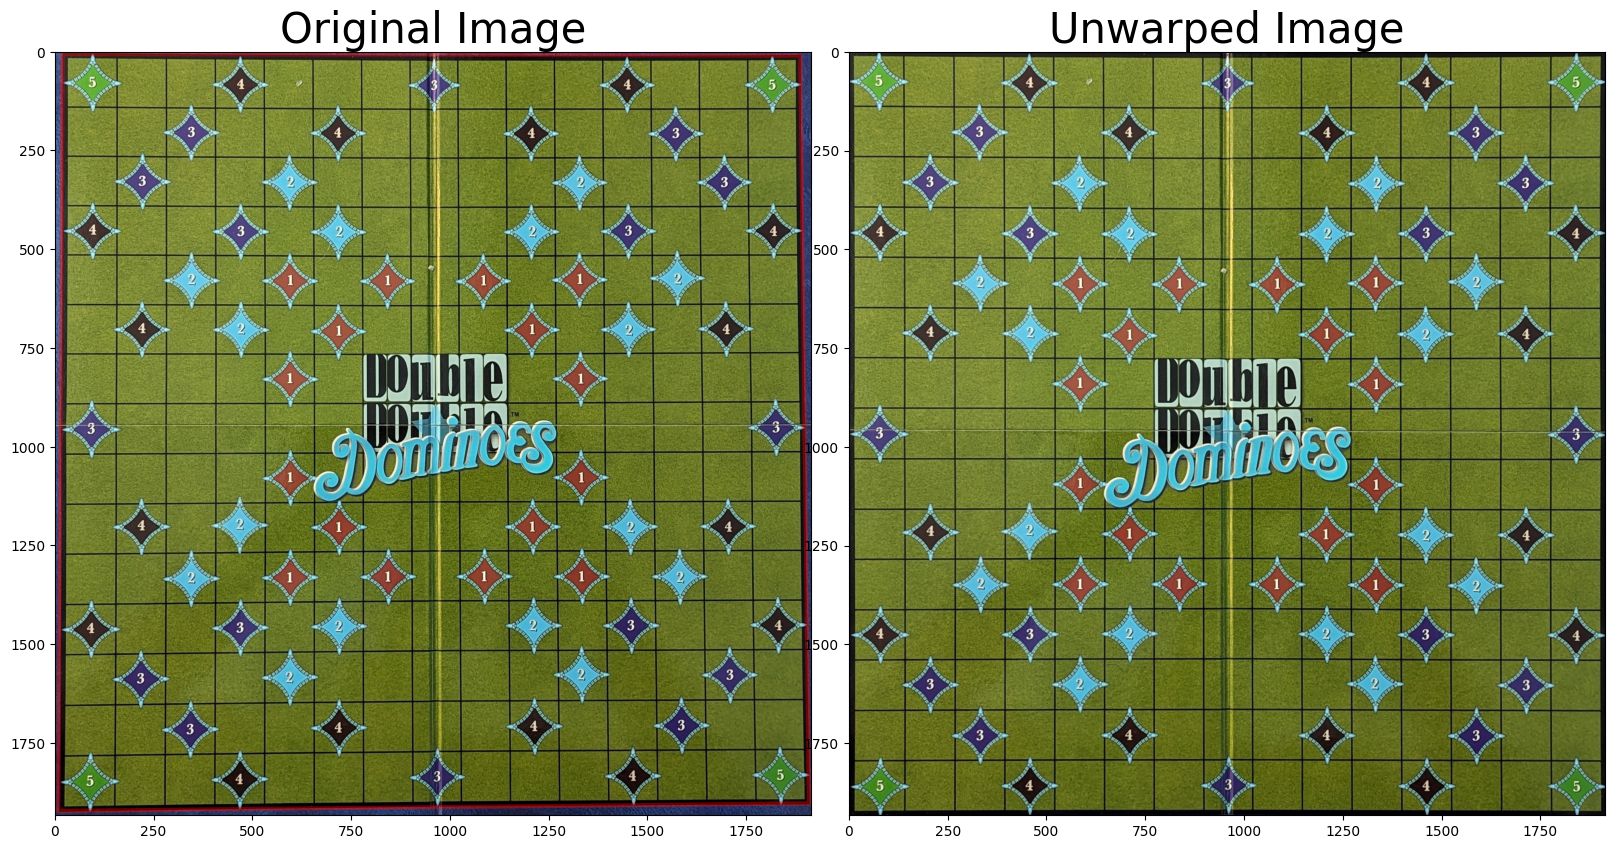

In [6]:
im = cv2.imread("Z:/Master II/CV - Computer Vision/zDouble-Double-Dominoes/_templates/02_only_mat.jpg")
w, h = im.shape[0], im.shape[1]
# We will first manually select the source points 
# we will select the destination point which will map the source points in
# original image to destination points in unwarped image
src = np.float32([(20,     6),
                  (1887,  10),
                  (9,    1922),
                  (1909,  1903)])

dst = np.float32([(1914, 0),
                  (0, 0),
                  (1914, 1933),
                  (0, 1933)])

unwarp(im, src, dst, True)
# cv2.imwrite('Z:/Master II/CV - Computer Vision/zDouble-Double-Dominoes/_templates/preproc_template.jpg', warped)
# cv2.imshow("so", dst)
# cv2.waitKey(0)  # [![enter image description here][1]][1]
# cv2.destroyAllWindows()